In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [2]:
import numpy as np

In [3]:
conn = sqlite3.connect("C:\\Users\\ss727\\Downloads\\63_589_compressed_database.sqlite\\database.sqlite")

In [4]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

In [5]:
countries = pd.read_sql_query("SELECT * from Country", conn)
matches = pd.read_sql_query("SELECT * from Match", conn)
leagues = pd.read_sql_query("SELECT * from League", conn)
teams = pd.read_sql_query("SELECT * from Team", conn)

In [6]:
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [7]:
df

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [8]:
matches.shape

(25979, 115)

In [9]:
tables = pd.read_sql("""SELECT * FROM sqlite_master WHERE type='table';""", conn)

In [10]:
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [11]:
detailed_matches = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER by date
                                LIMIT 10;""", conn)
detailed_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


In [12]:
detailed_matches2 = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Italy'
                                ORDER by date
                                LIMIT 10;""", conn)
detailed_matches2

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,10264,Italy,Italy Serie A,2008/2009,1,2008-08-30 00:00:00,Sampdoria,Inter,1,1
1,10266,Italy,Italy Serie A,2008/2009,1,2008-08-30 00:00:00,Udinese,Palermo,3,1
2,10257,Italy,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,Atalanta,Siena,1,0
3,10258,Italy,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,Cagliari,Lazio,1,4
4,10259,Italy,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,Catania,Genoa,1,0
5,10260,Italy,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,Chievo Verona,Reggio Calabria,2,1
6,10261,Italy,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,Fiorentina,Juventus,1,1
7,10262,Italy,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,Milan,Bologna,1,2
8,10263,Italy,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,Roma,Napoli,1,1
9,10265,Italy,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,Torino,Lecce,3,0


In [13]:
detailed_matches=pd.read_sql("""SELECT Match.id,
                                    Country.name AS country_name,
                                    League.name AS league_name,
                                    season,
                                    stage,
                                    date,
                                    HT.team_long_name AS home_team,
                                    AT.team_long_name AS away_team,
                                    home_team_goal,
                                    away_team_goal
                                FROM Match
                                JOIN Country on Country.id=Match.country_id
                                JOIN League on League.id=Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id=Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id=Match.away_team_api_id
                                WHERE country_name='Spain'
                                ORDER by date
                                LIMIT 10;""",conn)

In [14]:

detailed_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


In [15]:
leages_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", conn)
leages_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


In [16]:
df=pd.DataFrame(index=np.sort(leages_by_season['season'].unique()),columns=leages_by_season['country_name'].unique())

In [17]:
df

,England,France,Germany,Italy,Spain
2008/2009,NaN,NaN,NaN,NaN,NaN
2009/2010,NaN,NaN,NaN,NaN,NaN
2010/2011,NaN,NaN,NaN,NaN,NaN
2011/2012,NaN,NaN,NaN,NaN,NaN
2012/2013,NaN,NaN,NaN,NaN,NaN
2013/2014,NaN,NaN,NaN,NaN,NaN
2014/2015,NaN,NaN,NaN,NaN,NaN
2015/2016,NaN,NaN,NaN,NaN,NaN


In [18]:
#extracting avg goals values for data analysis
for i in np.sort(leages_by_season['season'].unique()):
    for j in leages_by_season['country_name'].unique():
        df[j][i]=float(leages_by_season[leages_by_season['season']==i][leages_by_season['country_name']==j]['avg_goals'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [19]:
df

,England,France,Germany,Italy,Spain
2008/2009,2.47895,2.25789,2.92157,2.6,2.89737
2009/2010,2.77105,2.41053,2.83007,2.61053,2.71316
2010/2011,2.79737,2.34211,2.92157,2.51316,2.74211
2011/2012,2.80526,2.51579,2.85948,2.5838,2.76316
2012/2013,2.79737,2.54474,2.93464,2.63947,2.87105
2013/2014,2.76842,2.45526,3.16013,2.72368,2.75
2014/2015,2.56579,2.49211,2.7549,2.68602,2.65526
2015/2016,2.7,2.52632,2.83007,2.57632,2.74474


In [20]:
np.sort(leages_by_season['season'].unique())

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

In [21]:
df.plot()

In [22]:
df_ad=pd.DataFrame(index=np.sort(leages_by_season['season'].unique()),columns=leages_by_season['country_name'].unique())
df_ad

,England,France,Germany,Italy,Spain
2008/2009,NaN,NaN,NaN,NaN,NaN
2009/2010,NaN,NaN,NaN,NaN,NaN
2010/2011,NaN,NaN,NaN,NaN,NaN
2011/2012,NaN,NaN,NaN,NaN,NaN
2012/2013,NaN,NaN,NaN,NaN,NaN
2013/2014,NaN,NaN,NaN,NaN,NaN
2014/2015,NaN,NaN,NaN,NaN,NaN
2015/2016,NaN,NaN,NaN,NaN,NaN


In [23]:
#extracting avg goals values for data analysis
for i in np.sort(leages_by_season['season'].unique()):
    for j in leages_by_season['country_name'].unique():
        df_ad[j][i]=float(leages_by_season[leages_by_season['season']==i][leages_by_season['country_name']==j]['avg_goal_dif'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [24]:
df_ad

,England,France,Germany,Italy,Spain
2008/2009,0.321053,0.315789,0.477124,0.442105,0.423684
2009/2010,0.623684,0.368421,0.196078,0.473684,0.486842
2010/2011,0.45,0.342105,0.372549,0.35,0.531579
2011/2012,0.373684,0.431579,0.460784,0.438547,0.594737
2012/2013,0.318421,0.392105,0.248366,0.35,0.502632
2013/2014,0.378947,0.376316,0.336601,0.35,0.513158
2014/2015,0.381579,0.328947,0.421569,0.311346,0.418421
2015/2016,0.284211,0.347368,0.300654,0.365789,0.492105


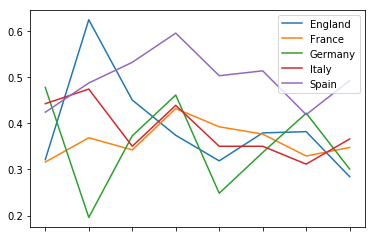

In [25]:
df_ad.plot()

In [26]:
players_height = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height, 
                                        COUNT(height) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight 
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""", conn)
players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


In [27]:
df.head()

,England,France,Germany,Italy,Spain
2008/2009,2.47895,2.25789,2.92157,2.6,2.89737
2009/2010,2.77105,2.41053,2.83007,2.61053,2.71316
2010/2011,2.79737,2.34211,2.92157,2.51316,2.74211
2011/2012,2.80526,2.51579,2.85948,2.5838,2.76316
2012/2013,2.79737,2.54474,2.93464,2.63947,2.87105


In [28]:
player_df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

In [29]:
player_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [30]:
player_df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [31]:
from pandas_profiling import ProfileReport

In [32]:
profile = ProfileReport(player_df)

In [33]:
profile.to_file("your_report.html")

In [34]:
list(player_df.columns)

['id',
 'player_fifa_api_id',
 'player_api_id',
 'date',
 'overall_rating',
 'potential',
 'preferred_foot',
 'attacking_work_rate',
 'defensive_work_rate',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

In [35]:
player_df.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [36]:
player_df["preferred_foot"]

0         right
1         right
2         right
3         right
4         right
5          left
6          left
7          left
8          left
9          left
10         left
11         left
12         left
13         left
14         left
15         left
16         left
17         left
18         left
19         left
20         left
21         left
22         left
23         left
24         left
25         left
26         left
27         left
28         left
29         left
          ...  
183948     left
183949     left
183950     left
183951     left
183952     left
183953     left
183954     left
183955     left
183956     left
183957     left
183958     left
183959     left
183960    right
183961    right
183962    right
183963    right
183964    right
183965    right
183966    right
183967    right
183968    right
183969    right
183970    right
183971    right
183972    right
183973    right
183974    right
183975    right
183976    right
183977    right
Name: preferred_foot, Le

In [37]:
player_df["preferred_foot_cat"]=player_df["preferred_foot"].apply(lambda x:1 if x=="right" else 0)

In [38]:
player_df["preferred_foot_cat"]

0         1
1         1
2         1
3         1
4         1
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
183948    0
183949    0
183950    0
183951    0
183952    0
183953    0
183954    0
183955    0
183956    0
183957    0
183958    0
183959    0
183960    1
183961    1
183962    1
183963    1
183964    1
183965    1
183966    1
183967    1
183968    1
183969    1
183970    1
183971    1
183972    1
183973    1
183974    1
183975    1
183976    1
183977    1
Name: preferred_foot_cat, Length: 183978, dtype: int64

In [39]:
data_c = player_df.drop(labels = ['id', 'player_fifa_api_id', 'player_api_id', 'date', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], axis = 1)

In [40]:
data_c.head()

,overall_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_cat
0,67.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
1,67.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
2,62.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1
3,61.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1
4,61.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1


In [41]:
data_c.fillna(0,inplace=True)

In [42]:
data_c.corr()

,overall_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_cat
overall_rating,1.000000,0.407858,0.366591,0.380763,0.523361,0.386351,0.409350,0.387834,0.387982,0.493020,...,0.447034,0.190923,0.222180,0.187744,0.055551,0.041053,0.057562,0.041757,0.040047,0.062885
crossing,0.407858,1.000000,0.591967,0.399936,0.800421,0.630650,0.817845,0.767877,0.718605,0.698429,...,0.592265,0.258325,0.308309,0.292988,-0.576993,-0.566574,-0.327121,-0.568712,-0.573339,-0.144988
finishing,0.366591,0.591967,1.000000,0.397826,0.596463,0.825051,0.792043,0.673450,0.643965,0.366116,...,0.730417,-0.251646,-0.196260,-0.219840,-0.460823,-0.445087,-0.271216,-0.450705,-0.453792,0.031804
heading_accuracy,0.380763,0.399936,0.397826,1.000000,0.577012,0.397802,0.430451,0.333206,0.336233,0.396208,...,0.461404,0.478005,0.497810,0.444338,-0.633358,-0.613835,-0.365397,-0.613889,-0.618252,0.021356
short_passing,0.523361,0.800421,0.596463,0.577012,1.000000,0.634077,0.799437,0.716161,0.704785,0.812058,...,0.634393,0.373845,0.438007,0.395919,-0.646891,-0.640196,-0.376692,-0.641546,-0.644686,-0.037520
volleys,0.386351,0.630650,0.825051,0.397802,0.634077,1.000000,0.769109,0.777817,0.665599,0.423872,...,0.684004,-0.136155,-0.074799,-0.034479,-0.468455,-0.460717,-0.292742,-0.464414,-0.466064,0.007654
dribbling,0.409350,0.817845,0.792043,0.430451,0.799437,0.769109,1.000000,0.790718,0.717229,0.597953,...,0.675059,0.036206,0.098754,0.081258,-0.622881,-0.618281,-0.401372,-0.621270,-0.624628,-0.055822
curve,0.387834,0.767877,0.673450,0.333206,0.716161,0.777817,0.790718,1.000000,0.768826,0.579755,...,0.623361,0.054464,0.114956,0.160536,-0.509608,-0.512554,-0.343375,-0.517110,-0.518396,-0.099917
free_kick_accuracy,0.387982,0.718605,0.643965,0.336233,0.704785,0.665599,0.717229,0.768826,1.000000,0.616341,...,0.679240,0.099406,0.159240,0.127292,-0.478719,-0.470163,-0.253813,-0.472931,-0.475092,-0.099861
long_passing,0.493020,0.698429,0.366116,0.396208,0.812058,0.423872,0.597953,0.579755,0.616341,1.000000,...,0.507171,0.458054,0.511765,0.467054,-0.424867,-0.425441,-0.222727,-0.427073,-0.429465,-0.059990


In [43]:
feature_cols = ['crossing', 'finishing', 'heading_accuracy', 'short_passing',
       'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes','preferred_foot_cat']

In [44]:
x=data_c[feature_cols]

In [45]:
y=data_c['overall_rating']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [47]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
linreg.score(x_train,y_train)

0.84776979612297

In [49]:
linreg.score(x_test,y_test)

0.8436097515728079

In [50]:
dt=DecisionTreeRegressor()

In [51]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [52]:
dt.score(x_train,y_train)

0.999350541269329

In [53]:
dt.score(x_test,y_test)

0.9734741358119463

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf=RandomForestClassifier()

In [56]:
rf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
rf.score(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
rf.score(x_test,y_test)

In [ ]:
predicted_overall_rating = dt.predict(x_test)